# Neural Networks Learning

### Introduction

We will use the same dataset as the exercise 4, but this time we will train a neural network to classify the data.

The data is composed of handwritten digits (from 0 to 9) and is a subset of the [MNIST handwritten digit dataset] (http://yann.lecun.com/exdb/mnist/)

The first step is to apply a neural network using the same parameters as the Octave version (alpha 1, 50 iterations and a hidden layers of 25). Then we change those parameters and see the effects on prediction accuracy.

### Reading and visualizing the data

The data comes from a .mat file and it contains a matrix x and a vector y.

x is a 5000 x 400 matrix that contains 5000 samples where each row is a extended array representing a 20 x 20 image. y is a 5000 vector that contains the correct digit, ranging from 1 to 10 (the 0 digit is represent as 10).

To display the images, we will definy two functions. The getImg() function will take a 1x400 vector and transforms into a 20x20 matrix (representing the image). The displayData() will take 100 random rows from x, create images from it and displays a 10x10 grid with those images.

In [1]:
import scipy.io
mat = scipy.io.loadmat('ex4data1.mat')
x = mat['X']
y = mat['y'].reshape(-1,1).ravel()

In [2]:
def getImg(row):
    width, height = 20, 20
    square = row.reshape(width,height)
    return square.T

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display

def displayData(indices_to_display = None):
    width, height = 20, 20
    nrows, ncols = 10, 10
    indices_to_display = random.sample(range(x.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getImg(x[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    plt.imshow(big_picture, cmap = cm.Greys_r)

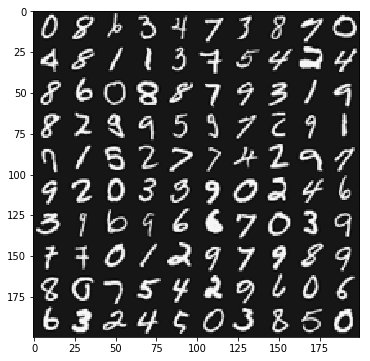

In [4]:
displayData()

### Classification

First, we define a function that accepts five parameters (alpha, hidden_layer_sizes and max_iter), instanciate and print the neural network and returns the accuracy.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def classify_image(alpha, hidden_layer_sizes, max_iter):
    nn = MLPClassifier(activation='logistic', solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=max_iter)
    nn.fit(x,y)
    predictions = nn.predict(x)
    accuracy = accuracy_score(predictions, y)
    print("The prediction accuracy is {} %".format(accuracy * 100))


In [6]:
classify_image(1, 25, 50)

The prediction accuracy is 98.22 %


With the defautl parameters, we were able to get a accuracy of 98.22%, but maybe this is overfitting the data. In the next step we will find the best combination of alpha, max iteration and hidden layers sizes, but we will evaluate the classifaction in a training and test set (if the accuracy is much bigger in the training set than the test set, the model is overfitting the data).

### Finding the best parameters

First, we will randomize the data and then create the train and test data.

In [7]:
permutation = np.random.permutation(x.shape[0])
xx = x[permutation]
yy = y[permutation]

x_train = xx[:3000, :]
y_train = yy[:3000]

x_test = xx[3000:, :]
y_test = yy[3000:]


Now, we will change the classify_image function to print the train and the test accuracy.

In [8]:
def classify_image_2(alpha, hidden_layer_sizes, max_iter):
    nn = MLPClassifier(activation='logistic', solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=max_iter)
    nn.fit(x_train,y_train)

    train_predictions = nn.predict(x_train)
    train_accuracy = round(accuracy_score(train_predictions, y_train) * 100,2)

    test_predictions = nn.predict(x_test)
    test_accuracy = round(accuracy_score(test_predictions, y_test) * 100,2)

    print("The train accuracy is {} % and the test accuracy is {} %".format(train_accuracy, test_accuracy))

In [9]:
alpha_list = [0.01, 0.1, 1]
hidden_layers_sizes_list = [5,10,15,20,25,30,35,40,45,50]

for alpha in alpha_list:
    for hidden_layers_sizes  in hidden_layers_sizes_list:
        print('alpha: {}, hidden_layer: {}'.format(alpha, hidden_layers_sizes))
        nn = classify_image_2(alpha, hidden_layers_sizes, 1000)

For every value of alpha, the biggest test accuracy is obtained with a hidden layer composed of 45 neurons. With 1000 iterations, the best alpha is 1; we will now increase this value to 100,000 and find the best alpha value, using a biggger list of alpha:

In [10]:
alpha_list = [0.01, 0.1, 0.5, 1, 2.5, 5, 10]

for alpha in alpha_list:
        print('alpha: {}'.format(alpha))
        nn = classify_image_2(alpha, 45, 100000)

alpha: 0.01
The train accuracy is 100.0 % and the test accuracy is 92.2 %
alpha: 0.1
The train accuracy is 100.0 % and the test accuracy is 93.5 %
alpha: 0.5
The train accuracy is 100.0 % and the test accuracy is 94.5 %
alpha: 1
The train accuracy is 99.87 % and the test accuracy is 94.05 %
alpha: 2.5
The train accuracy is 98.23 % and the test accuracy is 93.35 %
alpha: 5
The train accuracy is 95.83 % and the test accuracy is 92.45 %
alpha: 10
The train accuracy is 92.97 % and the test accuracy is 91.1 %


As we can see, bigger alphas generate better test accuracy, until a point. After this point the test and train accuracy falls. Now, we will fixate the alpha equals to 0.5 and the hidden layers size as 45 and iterate the number of variables:

In [12]:
max_iter_list = [100, 1000, 10000, 100000, 1000000]

for max_iter in max_iter_list:
        print('max_iter: {}'.format(max_iter))
        nn = classify_image_2(0.5, 45, max_iter)

max_iter: 100
The train accuracy is 100.0 % and the test accuracy is 93.95 %
max_iter: 1000
The train accuracy is 100.0 % and the test accuracy is 94.5 %
max_iter: 10000
The train accuracy is 100.0 % and the test accuracy is 94.5 %
max_iter: 100000
The train accuracy is 100.0 % and the test accuracy is 94.5 %
max_iter: 1000000
The train accuracy is 100.0 % and the test accuracy is 94.5 %


After a certain point, increasing the max_iter variable doesn't change the results (that's because the training algorithm stops before because of error metrics).

### Conclusion

The best parameters for the model is a hidden layer size of 45 elements, alpha of 0.5 and max_iterations of 1000. This generates a prediction accuracy of 94.5% in the test set.